# POLA HARSHA
# Course: Data Analytics

In [1]:
import pandas as pd

In [2]:
trxn= pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response= pd.read_csv('Retail_Data_Response.csv')

In [5]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df=trxn.merge(response, on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
df.dtypes
df.shape
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [8]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [9]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [10]:
df.dropna()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [11]:
df['trans_date']=pd.to_datetime(df['trans_date'])

C:\Users\Pola harsha\AppData\Local\Temp\ipykernel_9816\2547581274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])


In [12]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [13]:
z_score= np.abs(stats.zscore(df['response']))
threshold=3

outliers=z_score>threshold
print([outliers])

NameError: name 'np' is not defined

In [ ]:
pip install seaborn

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt 

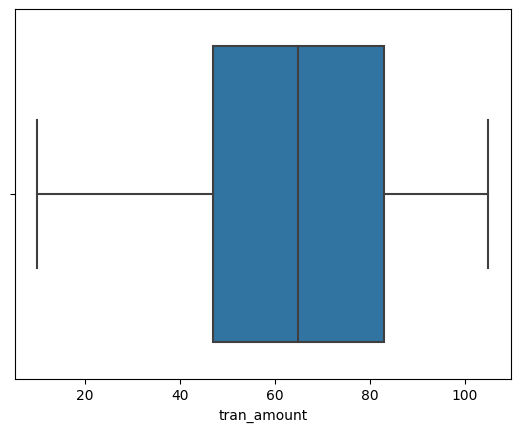

In [30]:
sns.boxplot(x=df['tran_amount'])
plt.show()

In [31]:
df['month']= df['trans_date'].dt.month

In [32]:
df

,customer_id,trans_date,tran_amount,response,month_year,month
0,CS5295,2013-02-11,35,1.0,2013-02,2
1,CS4768,2015-03-15,39,1.0,2015-03,3
2,CS2122,2013-02-26,52,0.0,2013-02,2
3,CS1217,2011-11-16,99,0.0,2011-11,11
4,CS1850,2013-11-20,78,0.0,2013-11,11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,2011-06,6
124996,CS7232,2014-08-19,38,0.0,2014-08,8
124997,CS8731,2014-11-28,42,0.0,2014-11,11
124998,CS8133,2013-12-14,13,0.0,2013-12,12


# Which 3 months have had the highest transaction amount 

In [33]:
monthly_Sales= df.groupby('month')['tran_amount'].sum ()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
            

In [34]:
monthly_Sales

,month,tran_amount
0,8,726921
1,10,725320
2,1,724107


# Customer having highest number of orders

In [35]:
customer_counts= df['customer_id'].value_counts().reset_index()


In [36]:
customer_counts.columns=['customer_id','count']
customer_counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35
...,...,...
6884,CS8559,4
6885,CS7716,4
6886,CS8376,4
6887,CS7224,4


In [37]:
top5_cus=customer_counts.sort_values(by='count',ascending=False).head(5)
top5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35


<Axes: xlabel='customer_id', ylabel='count'>

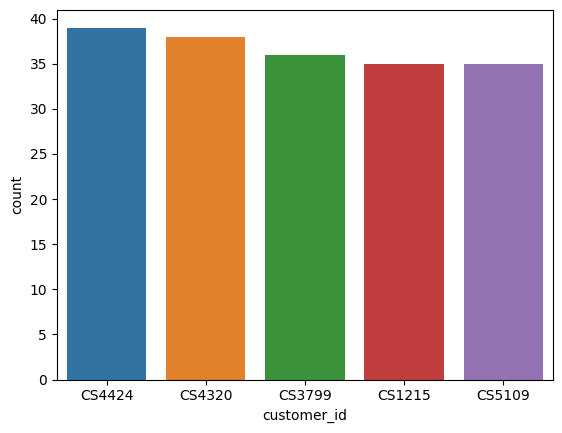

In [38]:
sns.barplot(x='customer_id',y='count',data=top5_cus)

# Customer having highest value of orders


In [39]:
customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6884,CS8996,582
6885,CS8997,543
6886,CS8998,624
6887,CS8999,383


In [40]:
top5_sal=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

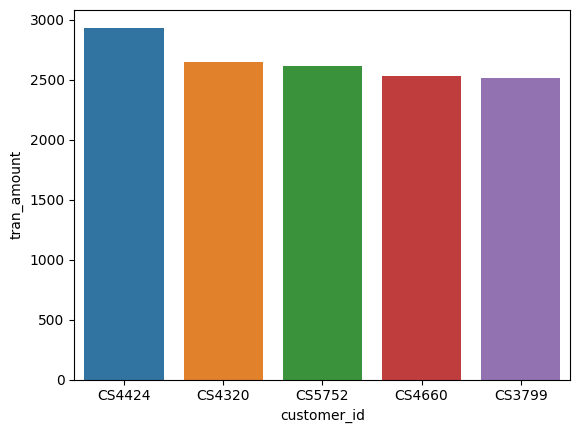

In [41]:
sns.barplot(x='customer_id',y='tran_amount',data=top5_sal)

# Advanced Analytics


# Time series analysis

In [42]:
df['month_year']= df['trans_date'].dt.to_period('M')
df

,customer_id,trans_date,tran_amount,response,month_year,month
0,CS5295,2013-02-11,35,1.0,2013-02,2
1,CS4768,2015-03-15,39,1.0,2015-03,3
2,CS2122,2013-02-26,52,0.0,2013-02,2
3,CS1217,2011-11-16,99,0.0,2011-11,11
4,CS1850,2013-11-20,78,0.0,2013-11,11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,2011-06,6
124996,CS7232,2014-08-19,38,0.0,2014-08,8
124997,CS8731,2014-11-28,42,0.0,2014-11,11
124998,CS8133,2013-12-14,13,0.0,2013-12,12


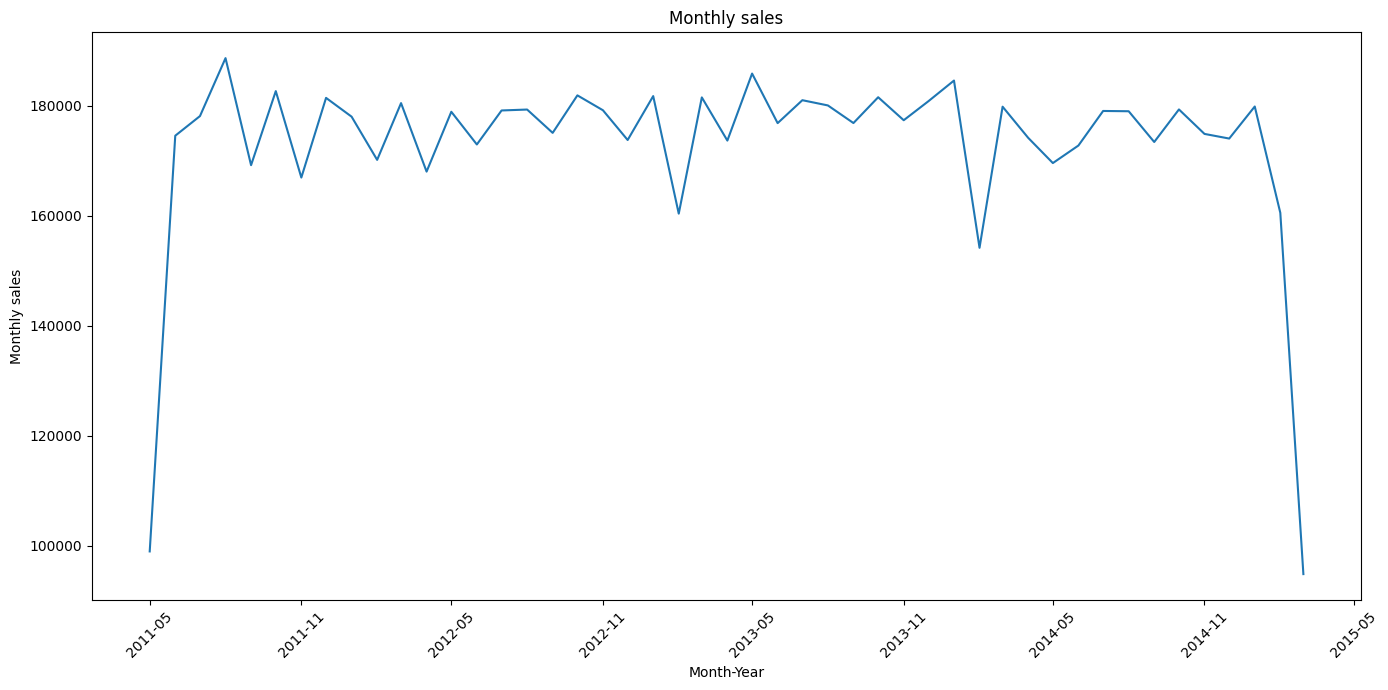

In [43]:
import matplotlib.dates as mdates

monthly_sales=df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(14,7))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel("Monthly sales")
plt.xticks(rotation=45)
plt.title("Monthly sales")
plt.tight_layout()

# Cohort segmentation

In [44]:
recency=df.groupby('customer_id')['trans_date'].max()
frequency=df.groupby('customer_id')['trans_date'].count()

monetary=df.groupby('customer_id')['tran_amount'].sum()

rfn=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})
rfn

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [45]:
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif(2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<1000):
        return 'P1'
    else:
        return 'P2'
rfn['Segment']= rfn.apply(segment_customer, axis=1)
rfn

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


# Churn analysis

<Axes: xlabel='response'>

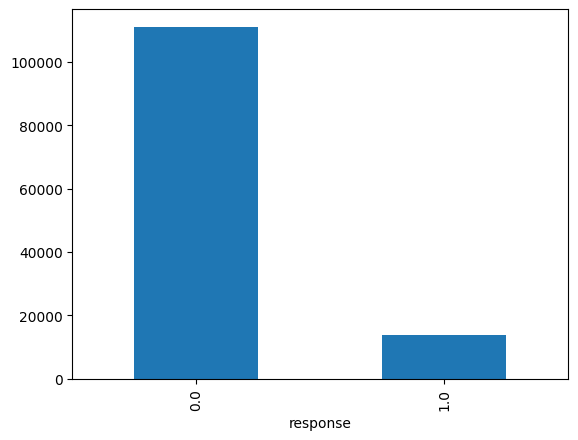

In [46]:
churn_counts = df['response'].value_counts()

churn_counts.plot(kind='bar')


# Analyzing top customers

<Axes: xlabel='month_year'>

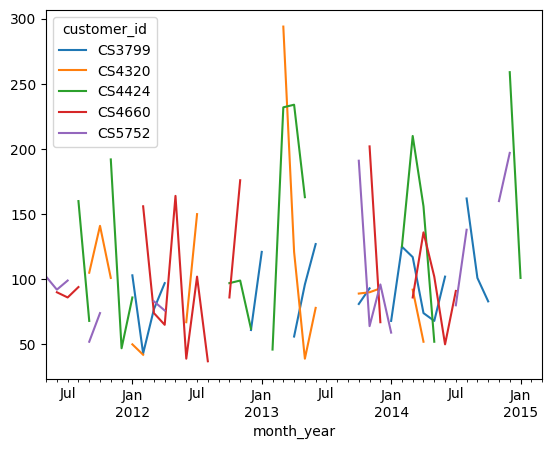

In [47]:
top5_cus=monetary.sort_values(ascending=False).head(5).index
top_customers_df=df[df['customer_id'].isin(top5_cus)]

top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [48]:
df

,customer_id,trans_date,tran_amount,response,month_year,month
0,CS5295,2013-02-11,35,1.0,2013-02,2
1,CS4768,2015-03-15,39,1.0,2015-03,3
2,CS2122,2013-02-26,52,0.0,2013-02,2
3,CS1217,2011-11-16,99,0.0,2011-11,11
4,CS1850,2013-11-20,78,0.0,2013-11,11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,2011-06,6
124996,CS7232,2014-08-19,38,0.0,2014-08,8
124997,CS8731,2014-11-28,42,0.0,2014-11,11
124998,CS8133,2013-12-14,13,0.0,2013-12,12


In [49]:
df.to_csv('Maindata.csv')


In [50]:
rfn.to_csv('AddAnlys.csv')